In [2]:
import pandas as pd
data5 = pd.read_csv('eph_tr.csv', sep=';')

In [3]:
from funpymodeling import profiling_num, freq_tbl, status

In [4]:
status(data5)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,edad,0,0.0,0,0.0,69,int64
1,sexo,0,0.0,0,0.0,2,object
2,alfabeto,0,0.0,0,0.0,2,object
3,sistema_salud,0,0.0,0,0.0,7,object
4,nivel_educativo,0,0.0,0,0.0,7,object
5,ocupacion_jerarquia,0,0.0,0,0.0,4,object
6,estado_civil,0,0.0,0,0.0,5,int64
7,ingreso,0,0.0,0,0.0,111,int64


In [5]:
data5.shape

(2461, 8)

# 2. Ver columnas que son object

In [6]:
max_unique_value = data5.select_dtypes(include=['object']).nunique().max()
for columna in data5.columns:
    valores_unicos = data5[columna].unique()
    if len(valores_unicos) <= max_unique_value:
        print(f"Valores únicos en la columna {columna}: \n {valores_unicos} \n")

Valores únicos en la columna sexo: 
 ['hombre' 'mujer'] 

Valores únicos en la columna alfabeto: 
 ['Si' 'No'] 

Valores únicos en la columna sistema_salud: 
 ['No paga ni le descuentan' 'Obra social (incluye PAMI)'
 'Obra social y mutual/prepaga/servicio de emergencia.'
 'Mutual / Prepaga / Servicio de emergencia' 'Planes y seguros públicos'
 'Ns./Nr.'
 'Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos'] 

Valores únicos en la columna nivel_educativo: 
 ['Superior Universitaria Completa' 'Primaria Completa'
 'Secundaria Incompleta' 'Secundaria Completa'
 'Primaria Incompleta(incluye educación especial)'
 'Superior Universitaria Incompleta' 'Sin instrucción'] 

Valores únicos en la columna ocupacion_jerarquia: 
 ['Cuenta propia' 'Director' 'otro' 'Trabajador asalariado'] 

Valores únicos en la columna estado_civil: 
 [1 4 3 5 2] 



### 2.1 Prepare estado_civil for data input

In [7]:
data4=data5.copy()

#### The original Data has been trasnformed by Pablo Casas in the contexto of the DataScience bootcamp of EdVai, so I need to search the original values

In [8]:
data_original = pd.read_csv('encuesta-anual-hogares-2019.csv', sep = ',')
data_original.shape

(14319, 31)

In [9]:
data_original.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

In [10]:
data_original['situacion_conyugal'].value_counts()

situacion_conyugal
Soltero/a                           3542
Casado/a                            3511
Unido/a                             2467
No corresponde                      2375
Separado/a de unión o matrimonio    1110
Viudo/a                              797
Divorciado/a                         516
Name: count, dtype: int64

In [11]:
data4['estado_civil'].value_counts()

estado_civil
1    799
4    711
3    597
2    285
5     69
Name: count, dtype: int64

In [12]:
#Too much diference between the data shape
print(data_original.shape)
print(data4.shape)

(14319, 31)
(2461, 8)


In [13]:
status(data_original)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,5795,int64
1,nhogar,0,0.000000,0,0.000000,7,int64
2,miembro,0,0.000000,0,0.000000,19,int64
3,comuna,0,0.000000,0,0.000000,15,int64
4,dominio,0,0.000000,0,0.000000,2,object
5,edad,0,0.000000,128,0.008939,101,int64
6,sexo,0,0.000000,0,0.000000,2,object
7,parentesco_jefe,0,0.000000,0,0.000000,9,object
8,situacion_conyugal,1,0.000070,0,0.000000,7,object
9,num_miembro_padre,0,0.000000,0,0.000000,9,object


In [14]:
max_unique_value_data_original = data_original.select_dtypes(include=['object']).nunique().max()
for columna in data_original.columns:
    valores_unicos = data_original[columna].unique()
    if len(valores_unicos) <= max_unique_value_data_original:
        print(f"Valores únicos en la columna {columna}: \n {valores_unicos} \n")

Valores únicos en la columna nhogar: 
 [1 2 3 4 5 6 7] 

Valores únicos en la columna miembro: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Valores únicos en la columna comuna: 
 [ 5  2 10 15  8 13 12  3  1  6  7 14 11  4  9] 

Valores únicos en la columna dominio: 
 ['Resto de la Ciudad' 'Villas de emergencia'] 

Valores únicos en la columna sexo: 
 ['Mujer' 'Varon'] 

Valores únicos en la columna parentesco_jefe: 
 ['Jefe' 'Otro no familiar' 'Padre/Madre/Suegro/a' 'Otro familiar'
 'Conyugue o pareja' 'Hijo/a - Hijastro/a' 'Nieto/a' 'Yerno/nuera'
 'Servicio domestico y sus familiares'] 

Valores únicos en la columna situacion_conyugal: 
 ['Soltero/a' 'Viudo/a' 'Unido/a' 'No corresponde'
 'Separado/a de unión o matrimonio' 'Divorciado/a' 'Casado/a' nan] 

Valores únicos en la columna num_miembro_padre: 
 ['Padre no vive en el hogar' 'No corresponde' '2' '1' '3' '4' '5' '7' '6'] 

Valores únicos en la columna num_miembro_madre: 
 ['Madre no vive en el hogar' '2' 'No co

##### Searching the filter of the data

In [15]:
count_ingresos_familiares = data_original['calidad_ingresos_familiares'].value_counts()['Tuvo ingresos y declara monto']
count_ingresos_familiares1 = count_ingresos_familiares[count_ingresos_familiares > 0]
print(count_ingresos_familiares)
count_ingresos_familiares1

10410


array([10410])

In [16]:
calidad_ingresos_totales = data_original['calidad_ingresos_totales'].value_counts()['Tuvo ingresos y declara monto']

calidad_ingresos_totales1 = calidad_ingresos_totales[calidad_ingresos_totales > 0]
print(calidad_ingresos_totales)
calidad_ingresos_totales1

8077


array([8077])

In [17]:
calidad_ingresos_lab = data_original['calidad_ingresos_lab'].value_counts()['Tuvo ingresos y declara monto']
calidad_ingresos_lab1 = calidad_ingresos_lab[calidad_ingresos_lab > 0]
print(calidad_ingresos_lab)
calidad_ingresos_lab1

5855


array([5855])

In [18]:
ingresos_totales = data_original['calidad_ingresos_lab'].value_counts()['Tuvo ingresos y declara monto']
ingresos_totales1 = ingresos_totales[ingresos_totales > 0]
print(ingresos_totales)
ingresos_totales1

5855


array([5855])

In [19]:
ingreso_per_capita_familiar = data_original['calidad_ingresos_lab'].value_counts()['Tuvo ingresos y declara monto']
ingreso_per_capita_familiar1 = ingreso_per_capita_familiar[ingreso_per_capita_familiar > 0]
print(ingreso_per_capita_familiar)
ingreso_per_capita_familiar1

5855


array([5855])

### I AM STUCKED
##### I will make 2 models, my own preparation of the original data, and other with the eph killing the 'estado civil' column. Obviusly I will NOT work so eficient, but is only for practice, nobody will be kill for doing this ... or yes? 😱

Finally Encuesta anual de hogares was made by Ciudad de Buenos Aires
And Encuesta Permanente de Hogares was made by INDEC
So the final conlcusion is .... ... .. .. .... ...

#### ARE 2 DIFERENTES DATA FRAME !!!!!!
#### WE HAVE BEEN LOSSING OUR PRECIUS TIME !!!!!!! OMG !

In [20]:
data4 = data4.drop('estado_civil', axis=1)
# YES!  : )
# KILL THEM !
data4.columns

Index(['edad', 'sexo', 'alfabeto', 'sistema_salud', 'nivel_educativo',
       'ocupacion_jerarquia', 'ingreso'],
      dtype='object')

# 3. OHE & Yes No columns

In [21]:
data3=data4.copy()
freq_tbl(data3)

     sexo  frequency  percentage  cumulative_perc
0  hombre       1579    0.641609         0.641609
1   mujer        882    0.358391         1.000000

----------------------------------------------------------------

  alfabeto  frequency  percentage  cumulative_perc
0       Si       2442     0.99228          0.99228
1       No         19     0.00772          1.00000

----------------------------------------------------------------

                                       sistema_salud  frequency  percentage  \
0                           No paga ni le descuentan       1199    0.487200   
1                         Obra social (incluye PAMI)       1021    0.414872   
2          Mutual / Prepaga / Servicio de emergencia        160    0.065014   
3  Obra social y mutual/prepaga/servicio de emerg...         47    0.019098   
4                          Planes y seguros públicos         28    0.011377   
5                                            Ns./Nr.          3    0.001219   
6  Mutual/

In [22]:
max_unique_value = data3.select_dtypes(include=['object']).nunique().max()
for columna in data3.columns:
    valores_unicos = data3[columna].unique()
    if len(valores_unicos) <= max_unique_value:
        print(f"Valores únicos en la columna {columna}: \n {valores_unicos} \n")

Valores únicos en la columna sexo: 
 ['hombre' 'mujer'] 

Valores únicos en la columna alfabeto: 
 ['Si' 'No'] 

Valores únicos en la columna sistema_salud: 
 ['No paga ni le descuentan' 'Obra social (incluye PAMI)'
 'Obra social y mutual/prepaga/servicio de emergencia.'
 'Mutual / Prepaga / Servicio de emergencia' 'Planes y seguros públicos'
 'Ns./Nr.'
 'Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos'] 

Valores únicos en la columna nivel_educativo: 
 ['Superior Universitaria Completa' 'Primaria Completa'
 'Secundaria Incompleta' 'Secundaria Completa'
 'Primaria Incompleta(incluye educación especial)'
 'Superior Universitaria Incompleta' 'Sin instrucción'] 

Valores únicos en la columna ocupacion_jerarquia: 
 ['Cuenta propia' 'Director' 'otro' 'Trabajador asalariado'] 



In [23]:
status(data3)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,edad,0,0.0,0,0.0,69,int64
1,sexo,0,0.0,0,0.0,2,object
2,alfabeto,0,0.0,0,0.0,2,object
3,sistema_salud,0,0.0,0,0.0,7,object
4,nivel_educativo,0,0.0,0,0.0,7,object
5,ocupacion_jerarquia,0,0.0,0,0.0,4,object
6,ingreso,0,0.0,0,0.0,111,int64


In [24]:
data2=data4.copy()
data2['sexo']=data3['sexo'].replace({'hombre': 0, 'mujer': 1})
data2['alfabeto']=data3['alfabeto'].replace({'Si': 0, 'No': 1})
replacements = {
    'No paga ni le descuentan': 1,
    'Obra social (incluye PAMI)': 5,
    'Obra social y mutual/prepaga/servicio de emergencia.': 6,
    'Mutual / Prepaga / Servicio de emergencia': 3,
    'Planes y seguros públicos': 2,
    'Ns./Nr.': 0,
    'Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos': 4
}

# Replace the values in the column
data2['sistema_salud'] = data3['sistema_salud'].replace(replacements)


In [25]:
replacements1 = {
    'Superior Universitaria Completa': 6,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Primaria Incompleta(incluye educación especial)': 1,
    'Superior Universitaria Incompleta': 5,
    'Sin instrucción': 0
}

# Replace the values in the column
data2['nivel_educativo'] = data3['nivel_educativo'].replace(replacements1)

In [26]:
replacements2 = {
    'Cuenta propia': 2,
    'Director': 3,
    'otro': 0,
    'Trabajador asalariado': 1
}

# Replace the values in the column
data2['ocupacion_jerarquia'] = data3['ocupacion_jerarquia'].replace(replacements2)

In [27]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,edad,0,0.0,0,0.000000,69,int64
1,sexo,0,0.0,1579,0.641609,2,int64
2,alfabeto,0,0.0,2442,0.992280,2,int64
3,sistema_salud,0,0.0,3,0.001219,7,int64
4,nivel_educativo,0,0.0,15,0.006095,7,int64
5,ocupacion_jerarquia,0,0.0,7,0.002844,4,int64
6,ingreso,0,0.0,0,0.000000,111,int64


In [28]:
for columna in data2.columns:
    valores_unicos = data2[columna].unique()
    if len(valores_unicos) < 8:
        print(f"Valores únicos en la columna {columna}: {valores_unicos}")

Valores únicos en la columna sexo: [0 1]
Valores únicos en la columna alfabeto: [0 1]
Valores únicos en la columna sistema_salud: [1 5 6 3 2 0 4]
Valores únicos en la columna nivel_educativo: [6 2 3 4 1 5 0]
Valores únicos en la columna ocupacion_jerarquia: [2 3 0 1]


In [29]:
data2['edad'].unique()

array([52, 43, 50, 22, 44, 46, 28, 36, 35, 30, 39, 74, 59, 40, 62, 49, 34,
       41, 26, 71, 21, 16, 63, 42, 54, 53, 64, 33, 47, 32, 31, 65, 25, 70,
       27, 60, 56, 51, 78, 38, 24, 37, 20, 29, 18, 69, 23, 58, 48, 55, 68,
       66, 61, 19, 57, 45, 67, 72, 73, 17, 79, 77, 75, 80, 76, 81, 83, 86,
       15])

<Axes: >

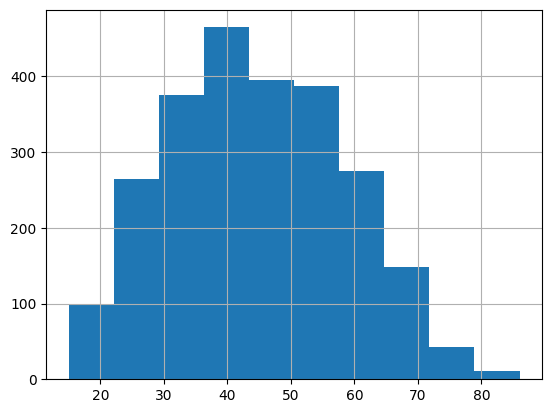

In [30]:
data2['edad'].hist()

<Axes: >

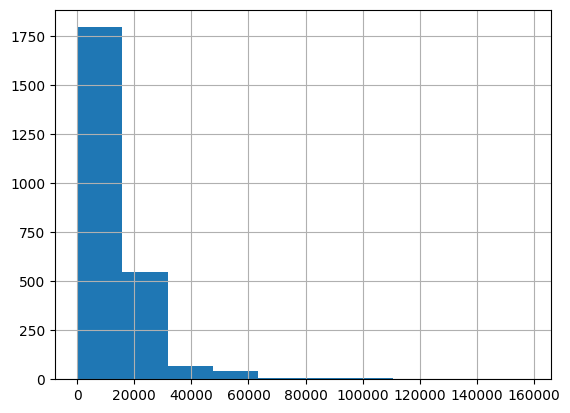

In [31]:
data2['ingreso'].hist()

In [32]:
data2['ingreso'].sort_values().unique()

array([   100,    200,    300,    400,    450,    500,    600,    700,
          720,    800,    843,    900,   1000,   1200,   1400,   1440,
         1500,   1600,   1700,   1800,   1920,   2000,   2400,   2500,
         2600,   2700,   2800,   3000,   3200,   3500,   3600,   3800,
         4000,   4200,   4320,   4500,   4800,   5000,   5500,   5600,
         6000,   6400,   6500,   6900,   7000,   7100,   7200,   7500,
         7800,   8000,   8300,   8400,   8500,   8600,   9000,   9500,
         9600,   9800,  10000,  10500,  10900,  11000,  11200,  11500,
        12000,  12500,  12600,  12800,  13000,  13500,  14000,  14400,
        15000,  15100,  15400,  15800,  16000,  16500,  17000,  17500,
        18000,  18500,  19000,  20000,  21000,  21600,  22000,  23000,
        24000,  25000,  26000,  26900,  27000,  28000,  29000,  30000,
        32000,  35000,  36000,  38000,  40000,  45000,  50000,  56000,
        60000,  65000,  70000,  80000,  90000, 100000, 158000])

In [33]:
p75 = data2['ingreso'].quantile(0.75)

# Create a boolean mask where each element is True if the corresponding value in 'ingreso' is greater than the 75th percentile
mask = data2['ingreso'] > p75

# Count the number of True values in the mask
count = mask.sum()

print(count)

606


In [34]:
# Calculate the 90th percentile of the 'ingreso' column
p90 = data2['ingreso'].quantile(0.9)

# Create a boolean mask where each element is True if the corresponding value in 'ingreso' is greater than the 90th percentile
mask = data2['ingreso'] > p90

# Count the number of True values in the mask
count = mask.sum()

print(count)

246


#### The outliers are not outliers at all for me, is the real life, and we don't hace enough data to drop them, we need them, they have the money!!


# 3. Save dataFrame

In [35]:
filename = "data.csv"
data2.to_csv(filename, index = False)

# 4. Lazy Gradio

In [36]:
data3 = data3.drop('ingreso', axis=1)

In [37]:
# Params Name

columnas = list(data3.columns)
nombres_columnas = ',\n'.join(['"' + columna + '"' for columna in columnas])
print(nombres_columnas)

"edad",
"sexo",
"alfabeto",
"sistema_salud",
"nivel_educativo",
"ocupacion_jerarquia"


In [38]:
columnas = list(data3.columns)
nombres_columnas = ',\n'.join([columna for columna in columnas])
nombres_columnas = nombres_columnas.rstrip() + ','
print(nombres_columnas)

edad,
sexo,
alfabeto,
sistema_salud,
nivel_educativo,
ocupacion_jerarquia,


In [39]:
# Labels

import numpy as np
columnas4 = data4.columns
for columna in columnas4:


    valor_mas_frecuente = data4[columna].value_counts().idxmax()
    # Verifica el tipo de dato de la columna
    if np.issubdtype(data4[columna].dtype, np.number):
        if len(data4[columna].unique()) <= 5:
            codigo_columna = f"{columna} = gr.Radio(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    choices={data4[columna].unique().tolist()},\n"
            codigo_columna += f"    value={valor_mas_frecuente},\n"
            codigo_columna += f")\n"
            print(codigo_columna)
        else:
            codigo_columna = f"{columna} = gr.Slider(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    minimum={data4[columna].min()},\n"
            codigo_columna += f"    maximum={data4[columna].max()},\n"
            codigo_columna += f"    step=1,\n"
            codigo_columna += f"    randomize=True\n"
            codigo_columna += f")\n"
            print(codigo_columna)
    else:
        # Verifica la cantidad de valores únicos en la columna
        if len(data4[columna].unique()) <= 3:
            codigo_columna = f"{columna} = gr.Radio(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    choices={data4[columna].unique().tolist()},\n"
            codigo_columna += f"    value='{valor_mas_frecuente}',\n"
            codigo_columna += f")\n"
            print(codigo_columna)
        else:
            codigo_columna = f"{columna} = gr.Dropdown(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    choices={data4[columna].unique().tolist()},\n"
            codigo_columna += f"    multiselect=False,\n"
            codigo_columna += f"    value='{valor_mas_frecuente}',\n"
            codigo_columna += f")\n"
            print(codigo_columna)

edad = gr.Slider(
    label='Edad',
    minimum=15,
    maximum=86,
    step=1,
    randomize=True
)

sexo = gr.Radio(
    label='Sexo',
    choices=['hombre', 'mujer'],
    value='hombre',
)

alfabeto = gr.Radio(
    label='Alfabeto',
    choices=['Si', 'No'],
    value='Si',
)

sistema_salud = gr.Dropdown(
    label='Sistema_Salud',
    choices=['No paga ni le descuentan', 'Obra social (incluye PAMI)', 'Obra social y mutual/prepaga/servicio de emergencia.', 'Mutual / Prepaga / Servicio de emergencia', 'Planes y seguros públicos', 'Ns./Nr.', 'Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos'],
    multiselect=False,
    value='No paga ni le descuentan',
)

nivel_educativo = gr.Dropdown(
    label='Nivel_Educativo',
    choices=['Superior Universitaria Completa', 'Primaria Completa', 'Secundaria Incompleta', 'Secundaria Completa', 'Primaria Incompleta(incluye educación especial)', 'Superior Universitaria Incompleta', 'Sin instrucción'],
    multiselect=False,
    value=

# for FastAPI

In [82]:
dtypes = data3.dtypes.replace({'int64': ': int', 'object': ': str'})
dtypes




edad                   : int
sexo                   : str
alfabeto               : str
sistema_salud          : str
nivel_educativo        : str
ocupacion_jerarquia    : str
dtype: object

# for REQUEST

In [84]:
caso1 = data3.iloc[3] 
caso1_json = caso1.to_dict()
caso1_json

{'edad': 22,
 'sexo': 'mujer',
 'alfabeto': 'Si',
 'sistema_salud': 'Obra social (incluye PAMI)',
 'nivel_educativo': 'Secundaria Completa',
 'ocupacion_jerarquia': 'Cuenta propia'}

In [85]:
caso1 = data3.iloc[27] 
caso1_json = caso1.to_dict()
caso1_json

{'edad': 71,
 'sexo': 'mujer',
 'alfabeto': 'Si',
 'sistema_salud': 'Obra social (incluye PAMI)',
 'nivel_educativo': 'Primaria Incompleta(incluye educación especial)',
 'ocupacion_jerarquia': 'Cuenta propia'}

In [86]:
caso1 = data3.iloc[99] 
caso1_json = caso1.to_dict()
caso1_json

{'edad': 56,
 'sexo': 'mujer',
 'alfabeto': 'Si',
 'sistema_salud': 'No paga ni le descuentan',
 'nivel_educativo': 'Secundaria Incompleta',
 'ocupacion_jerarquia': 'Cuenta propia'}

In [87]:
caso1 = data3.iloc[144] 
caso1_json = caso1.to_dict()
caso1_json

{'edad': 36,
 'sexo': 'hombre',
 'alfabeto': 'Si',
 'sistema_salud': 'Obra social (incluye PAMI)',
 'nivel_educativo': 'Superior Universitaria Completa',
 'ocupacion_jerarquia': 'Cuenta propia'}